In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [0]:
X , Y = make_classification(n_samples=3000, n_features=3, n_informative=3,n_repeated=0, n_redundant=0, n_classes=3, n_clusters_per_class=1,random_state=1)
#1 , 5

In [3]:
print (X.shape)
print (Y.shape)
print (X[4:8])
print (Y[4:8])

(3000, 3)
(3000,)
[[-1.49732687 -0.22878757  0.23047655]
 [ 1.47556927  1.43461431  0.87908826]
 [-1.15095254 -1.21883182  0.44794334]
 [-0.81013534  0.31707414 -0.16711166]]
[2 0 1 2]


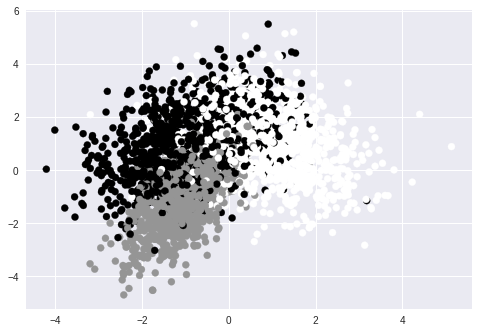

In [4]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [0]:
def hypo(x,theta):
    return 1.0/(1 + np.exp(-np.dot(x,theta)))

In [0]:
def cost(X,Y,theta):
    m = X.shape[0]
    cost= 0
    for i in range(m):
        hx = hypo(X[i],theta)
        cost += Y[i]*np.log(hx) + (1-Y[i])*np.log(1-hx)
    return cost

In [0]:
def grad(X,Y,theta):
    m = X.shape[0]
    n = X.shape[1]
    grad = np.zeros((n,))
    for i in range(m):
        for j in range(n):
            hx = hypo(X[i],theta)
            grad[j] += (Y[i] - hx)*X[i][j]
    return grad

In [0]:
def gradientAscent(X,Y,learning_rate=0.01):
    m = X.shape[0]
    n = X.shape[1]
    theta =  np.zeros((n,))
    theta += 0.1
    costs = []
    ctr = 0
    
    while True:
        g = grad(X,Y,theta)
    
        for j in range(n):
            theta[j] = theta[j] + learning_rate*g[j]
        
        c = cost(X,Y,theta)    
        costs.append(c)
        
        #if ctr > 21:
         #   break
        
        if (ctr > 5) and abs(costs[ctr-1] - costs[ctr]) < 0.0001:
            break
        
        if(ctr%100==0):
            print (c)
            print (ctr)
        
        if np.isnan(c) or c == np.inf:
            print ('*'*15,learning_rate,'*'*15,learning_rate/3,'*'*15)
            return gradientAscent(X,Y,learning_rate/3)
        
        ctr += 1
    
    return theta,costs

In [0]:
def pred(xtest,theta):
    hx = hypo(xtest,theta)
    if hx >= 0.5:
        return 1,hx
    else:
        return 0,1-hx

In [10]:
ones = np.ones((X.shape[0],1))
print (ones.shape)
X_train = np.hstack((ones,X))
print (X_train.shape)

(3000, 1)
(3000, 4)


In [0]:
theta,costs = gradientAscent(X_train,Y)

nan
0
*************** 0.01 *************** 0.0033333333333333335 ***************


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


nan
0
*************** 0.0033333333333333335 *************** 0.0011111111111111111 ***************
4959.597747359845
0
*************** 0.0011111111111111111 *************** 0.00037037037037037035 ***************
765.5517058202017
0
*************** 0.00037037037037037035 *************** 0.0001234567901234568 ***************
-1100.7446182104736
0
*************** 0.0001234567901234568 *************** 4.11522633744856e-05 ***************
-1864.6445404232127
0
*************** 4.11522633744856e-05 *************** 1.3717421124828534e-05 ***************
-2140.1171008220895
0
3986.5565172175643
100
7966.200552906796
200
*************** 1.3717421124828534e-05 *************** 4.572473708276178e-06 ***************
-2234.3218263557105
0
719.4003882812133
100
2469.0197936382574
200
3950.2625999063366
300
5325.812308926819
400
6646.170420399599
500
7933.0062988758955
600
9197.602575821467
700
10446.521180324542
800
*************** 4.572473708276178e-06 *************** 1.524157902758726e-06 ***********

In [0]:
xtest = np.linspace(-3,3,10)
ytest = -(theta[0] + theta[1]*xtest)/theta[2]

In [0]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.plot(xtest,ytest,'r')
plt.show()

In [0]:
print (costs)

In [0]:
plt.plot(costs)

In [0]:
print (xtest)
print (theta)

In [0]:
xtest1 = np.array([1,0,-1])
ans,prob = pred(xtest1,theta)

In [0]:
print (ans,prob)
for i in range(Y.shape[0]):
    if(Y[i] == 0):
        plt.scatter(X[i:i+1,0],X[i:i+1,1],c='orange')
    else:
        plt.scatter(X[i:i+1,0],X[i:i+1,1],c='cyan')
plt.plot(xtest,ytest,'r')
plt.scatter(xtest1[1],xtest1[2],marker='*',color = 'black')
plt.show()